# Classification Report with GLCM and BERT

## Create and Save CSV

In [18]:
# libs
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from PIL import Image
import ast

import tensorflow as tf

from keras.applications import ResNet50

from skimage.feature import greycomatrix, greycoprops

import warnings
warnings.filterwarnings('ignore')

In [2]:
# function
# Function to extract visual features using ResNet50
def extract_visual_features(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize image for ResNet50 input
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    visual_features = model.predict(img_array, verbose = 0)

    return visual_features

# Function to compute GLCM texture features
def compute_texture_features(image_path):
    # Define your GLCM properties (distances and angles)
    distances = [1, 3, 5, 3, 1, 3, 5]
    angles = [0, 0, 0, np.pi/4, np.pi/2, np.pi/2, np.pi/2]
    
    glcm_features = []
    for distance, angle in zip(distances, angles):
        img_gray = Image.open(image_path).convert('L')  # Convert image to grayscale
        img_gray_array = np.array(img_gray)

        # Compute GLCM properties
        glcm = greycomatrix(img_gray_array, distances=[distance], angles=[angle], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]       
        
        glcm_features.extend([contrast, dissimilarity, homogeneity, energy, correlation])
        
    return np.array(glcm_features) # np.array([contrast, dissimilarity, homogeneity, energy, correlation])

# Load image data and compute features
def load_data_and_compute_features(data_dir):
    visual_features = []
    texture_features = []
    labels = []

    classes = os.listdir(data_dir)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    # print(f"classes : {classes} \nclass_to_index : {class_to_index}")

    for cls in tqdm(classes, desc="Processing images"):
        cls_dir = os.path.join(data_dir, cls)

        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)

            # Extract visual features using ResNet50
            visual_feat = extract_visual_features(img_path)
            visual_features.append(visual_feat)
            # print(f"visual_features : {visual_features}")

            # Compute texture features using GLCM
            texture_feat = compute_texture_features(img_path)
            texture_features.append(texture_feat)
            # print(f"texture_features : {texture_features}")

            # Assign label index
            labels.append(class_to_index[cls])
            # print(f"img_path : {img_path} || labels : {class_to_index[cls]} \n")
            # print(f"texture_features : {texture_feat} \n")

    visual_features = np.array(visual_features)
    texture_features = np.array(texture_features)
    labels = np.array(labels)

    return visual_features, texture_features, labels

In [3]:
# load_data_and_compute_features
data_directory = 'C:\Project_Work\Basic_Python\Zero_shot_Learning\Dataset\data1_mini'
visual_features, texture_features, labels = load_data_and_compute_features(data_directory)
print('Done')
print(visual_features.shape, texture_features.shape, labels.shape)

Processing images:   0%|                                                                                                   | 0/18 [00:00<?, ?it/s]

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:   6%|█████                                                                                      | 1/18 [01:01<17:23, 61.40s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  11%|██████████                                                                                 | 2/18 [01:59<15:55, 59.74s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  17%|███████████████▏                                                                           | 3/18 [02:59<14:54, 59.66s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  22%|████████████████████▏                                                                      | 4/18 [04:01<14:07, 60.51s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  28%|█████████████████████████▎                                                                 | 5/18 [04:58<12:51, 59.34s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  33%|██████████████████████████████▎                                                            | 6/18 [06:03<12:15, 61.29s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  39%|███████████████████████████████████▍                                                       | 7/18 [07:05<11:14, 61.36s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  44%|████████████████████████████████████████▍                                                  | 8/18 [08:05<10:10, 61.03s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  50%|█████████████████████████████████████████████▌                                             | 9/18 [09:06<09:07, 60.88s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  56%|██████████████████████████████████████████████████                                        | 10/18 [10:06<08:05, 60.63s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  61%|███████████████████████████████████████████████████████                                   | 11/18 [11:06<07:02, 60.41s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  67%|████████████████████████████████████████████████████████████                              | 12/18 [12:07<06:04, 60.75s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  72%|█████████████████████████████████████████████████████████████████                         | 13/18 [13:08<05:04, 60.82s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  78%|██████████████████████████████████████████████████████████████████████                    | 14/18 [14:08<04:02, 60.54s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  83%|███████████████████████████████████████████████████████████████████████████               | 15/18 [15:08<03:00, 60.26s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  89%|████████████████████████████████████████████████████████████████████████████████          | 16/18 [16:08<02:00, 60.21s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images:  94%|█████████████████████████████████████████████████████████████████████████████████████     | 17/18 [17:12<01:01, 61.52s/it]C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

Processing images: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 18/18 [18:27<00:00, 61.51s/it]

Done
(360, 1, 2048) (360, 35) (360,)


In [4]:
data_vt = pd.DataFrame(np.concatenate([visual_features.reshape(visual_features.shape[0], -1), texture_features], axis=1))
data_vt['labels'] = labels

data_vt.to_csv('data1_visual_features_texture_features_labels_sample20_mini.csv', index=False)

# ---------------------------------------------------------------------------------------------

## Model Train and Test

In [3]:
# lib's
from pickle import dump , load

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense, Concatenate, Flatten
from keras.optimizers import Adam

import matplotlib.pyplot as plt

# !pip install h5py

import h5py


In [4]:
# Variable's
min_max_scaler_file = 'min_max_scaler_h5_sample20_mini.pkl'

In [5]:
# Function
# Build and train a classification model
def build_and_train_model(visual_features, texture_features, labels):
    # Concatenate visual and texture features
    combined_features = np.concatenate([visual_features, 
                                        texture_features], 
                                       axis=1)
#     combined_features = np.concatenate([visual_features.reshape(visual_features.shape[0], -1), 
#                                         texture_features], 
#                                        axis=1)
    
    # Normalize the features
    min_max_scaler = StandardScaler()
    train_normalized_texture_features = min_max_scaler.fit_transform(combined_features)
    train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
    
    # save 
    dump(min_max_scaler, open(min_max_scaler_file, 'wb'))

    # Split data into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(combined_features, 
#                                                         labels, 
#                                                         test_size=0.3, 
#                                                         random_state=42, 
#                                                         stratify=labels)
    X_train, X_test, y_train, y_test = train_test_split(train_normalized_texture_features_df, 
                                                        labels, 
                                                        test_size=0.3, 
                                                        random_state=42, 
                                                        stratify=labels)

    # Define classification model
    input_layer = Input(shape=(combined_features.shape[1],))
    hidden_layer = Dense(128, activation='relu')(input_layer)
    output_layer = Dense(len(np.unique(labels)), activation='softmax')(hidden_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.summary()
    model.compile(optimizer=Adam(lr=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, 
                        epochs=100, 
                        batch_size=64, 
                        validation_data=(X_test, y_test))
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)

    plt.plot(epochs, acc, label='training accuracy')
    plt.plot(epochs, val_acc, label='validation accuracy')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('Training validation Accuracy')
    plt.show()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('Training validation Loss')
    plt.show()

    return model # history # model

In [6]:
# load csv
data_vtl = pd.read_csv('data1_visual_features_texture_features_labels_sample20_mini.csv')
visual_features, texture_features, labels = data_vtl.iloc[:,:2048], data_vtl.iloc[:,2048:-1], data_vtl.iloc[:,-1]


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2083)]            0         
                                                                 
 dense (Dense)               (None, 128)               266752    
                                                                 
 dense_1 (Dense)             (None, 18)                2322      
                                                                 
Total params: 269074 (1.03 MB)
Trainable params: 269074 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100



4/4 [==============================] - 2s 121ms/step - loss: 2.5722 - accuracy: 0.2976 - val_loss: 1.0872 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.3483 - accuracy: 0.9563 - val_loss: 0.5038 - val_accuracy: 0.9074
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0608 - accuracy: 0.9921 - val_loss: 0.3843 - val_accuracy: 0.8981
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3456 - val_accuracy: 0.9167
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.3286 - val_accuracy: 0.9167
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3204 - val_accuracy: 0.9167
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3158 - val_accuracy: 0.9167
Epoch 8/100
4/4 [==============

Epoch 58/100
4/4 [==============================] - 0s 24ms/step - loss: 2.4059e-04 - accuracy: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9167
Epoch 59/100
4/4 [==============================] - 0s 20ms/step - loss: 2.3689e-04 - accuracy: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9167
Epoch 60/100
4/4 [==============================] - 0s 19ms/step - loss: 2.3320e-04 - accuracy: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9167
Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 2.2981e-04 - accuracy: 1.0000 - val_loss: 0.3126 - val_accuracy: 0.9167
Epoch 62/100
4/4 [==============================] - 0s 24ms/step - loss: 2.2638e-04 - accuracy: 1.0000 - val_loss: 0.3126 - val_accuracy: 0.9167
Epoch 63/100
4/4 [==============================] - 0s 26ms/step - loss: 2.2291e-04 - accuracy: 1.0000 - val_loss: 0.3126 - val_accuracy: 0.9167
Epoch 64/100
4/4 [==============================] - 0s 18ms/step - loss: 2.1992e-04 - accuracy: 1.0000 - val_loss: 0.3126 - val_ac

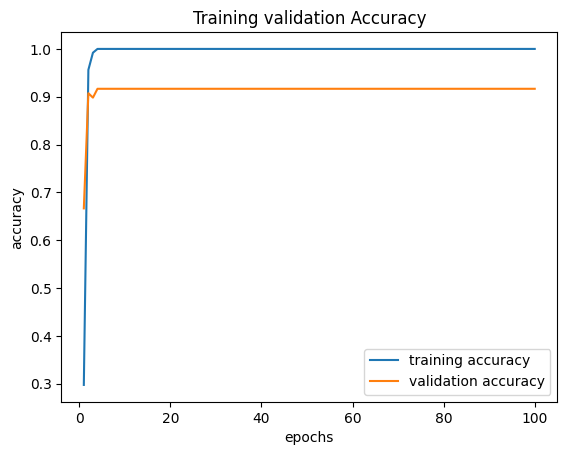

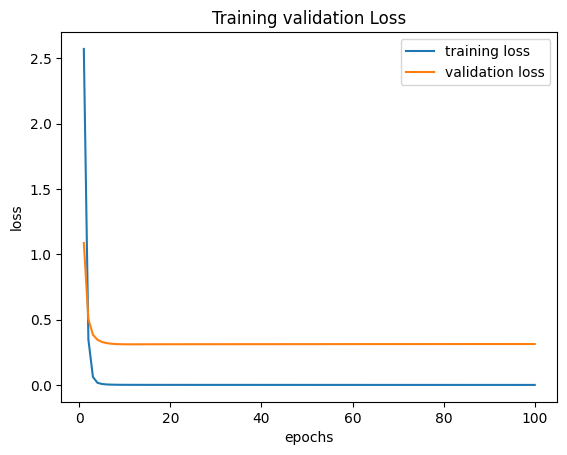

In [7]:
# Build and train the classification model
classification_model = build_and_train_model(visual_features, texture_features, labels)
classification_model

In [1]:
# save model and architecture to single file
classification_model.save("model_h5_sample20_mini.h5")
print("Saved model to disk")

NameError: name 'classification_model' is not defined

# -------------------------------------------------------------------------------------

## Classification Report

In [6]:
# lib's
import glob


In [7]:
# Load models
classification_model = load_model('model_h5_sample100.h5')
min_max_scaler_model = load(open('min_max_scaler_h5_sample100.pkl', 'rb'))
class_labels = ['bear', 'blue_whale', 'bobcat', 'cow', 'dolphin', 'gorilla', 
                'killer_whale', 'lion', 'monkey', 'mouse', 'ox', 'rabbit', 
                'rhinoceros', 'siamese_cat', 'skunk', 'squirrel', 'tiger', 'walrus']

### CR without BERT

In [140]:
'''
Note : Added way to read the folde images one by one.
'''

folder_name = 'walrus'
folder_path = os.path.join('test', folder_name, '*')
print(folder_path)
for img_path in glob.glob(folder_path):
    print(img_path)
    

test\walrus\*
test\walrus\walrus_10001.jpg
test\walrus\walrus_10002.jpg
test\walrus\walrus_10003.jpg
test\walrus\walrus_10004.jpg
test\walrus\walrus_10005.jpg
test\walrus\walrus_10006.jpg
test\walrus\walrus_10007.jpg
test\walrus\walrus_10008.jpg
test\walrus\walrus_10009.jpg
test\walrus\walrus_10010.jpg
test\walrus\walrus_10011.jpg


In [95]:
image_path, image_label, pred_image_label, act_label, pred_label = [], [], [], [], []

# for img_path in glob.glob(r"test/*/*"):
for img_path in glob.glob(folder_path):
#     print(f"img_path : {img_path}")
    image_path.append(img_path)
    image_label.append(img_path.split('\\')[-2])
    act_label.append(class_labels.index(img_path.split('\\')[-2]))

    # Extract visual features using ResNet50
    visual_features = extract_visual_features(img_path)
#     print(f"visual_features : {visual_features.shape} || {type(visual_features)}")

    # Compute texture features using GLCM
    texture_features = compute_texture_features(img_path)
#     print(f"texture_feat : {texture_features.shape} || {type(texture_features)}")
    
    # Concatenate visual and texture features
    l1 = visual_features[0].tolist()
    l2 = texture_features.tolist()
    l1.extend(l2)
    combined_features = np.array(l1)
#     print(f"combined_features : {combined_features}")
    
    # Normalize the features
    train_normalized_texture_features = min_max_scaler_model.transform([combined_features])
    train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
#     print(f"train_normalized_texture_features_df : {train_normalized_texture_features_df}")

#     model.predict
    predicted_value = classification_model.predict(train_normalized_texture_features_df, verbose = 0)
#     print(f"predicted_value : {np.argmax(predicted_value)} || {class_labels[np.argmax(predicted_value)]}")
    pred_image_label.append(class_labels[np.argmax(predicted_value)])
    pred_label.append(np.argmax(predicted_value))
    
#     break

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

In [96]:
out_df = pd.DataFrame({
    'image_path' : image_path, 
    'image_label' : image_label, 
    'pred_image_label' : pred_image_label, 
    'act_label' : act_label, 
    'pred_label' : pred_label
})
out_df

image_path image_label pred_image_label  act_label  \
0   test\walrus\walrus_10001.jpg      walrus           walrus         17   
1   test\walrus\walrus_10002.jpg      walrus           walrus         17   
2   test\walrus\walrus_10003.jpg      walrus           walrus         17   
3   test\walrus\walrus_10004.jpg      walrus           walrus         17   
4   test\walrus\walrus_10005.jpg      walrus           walrus         17   
5   test\walrus\walrus_10006.jpg      walrus           walrus         17   
6   test\walrus\walrus_10007.jpg      walrus           walrus         17   
7   test\walrus\walrus_10008.jpg      walrus            skunk         17   
8   test\walrus\walrus_10009.jpg      walrus           walrus         17   
9   test\walrus\walrus_10010.jpg      walrus           walrus         17   
10  test\walrus\walrus_10011.jpg      walrus           walrus         17   

    pred_label  
0           17  
1           17  
2           17  
3           17  
4           17  
5           17  
6           17  
7           14  
8           17  
9           17  
10          17

In [144]:
metadata_folder_name = 'metadata'
os.makedirs(metadata_folder_name, exist_ok=True) 
metadata_file_name = os.path.join(metadata_folder_name, folder_name + '_resnet50_result.csv')
out_df.to_csv(metadata_file_name, index = False)

In [145]:
'''
Note : Run only after compliting all classes
'''
metadata_file_name = os.path.join(metadata_folder_name, '*')
df_list = [pd.read_csv(df_path) for df_path in glob.glob(metadata_file_name)]

out_df = pd.concat(df_list).reset_index(drop=True)
out_df

image_path image_label pred_image_label  act_label  \
0      test\bear\bear_10001 (1).jpg        bear             bear          0   
1     test\bear\bear_10001 (10).jpg        bear             bear          0   
2     test\bear\bear_10001 (11).jpg        bear             bear          0   
3      test\bear\bear_10001 (2).jpg        bear             bear          0   
4      test\bear\bear_10001 (3).jpg        bear             bear          0   
..                              ...         ...              ...        ...   
248  test\gorilla\gorilla_10007.jpg         NaN          gorilla          5   
249  test\gorilla\gorilla_10008.jpg         NaN          gorilla          5   
250  test\gorilla\gorilla_10009.jpg         NaN          gorilla          5   
251  test\gorilla\gorilla_10010.jpg         NaN          gorilla          5   
252  test\gorilla\gorilla_10011.jpg         NaN          gorilla          5   

     pred_label class_name                                   similar_words  
0             0        NaN                                             NaN  
1             0        NaN                                             NaN  
2             0        NaN                                             NaN  
3             0        NaN                                             NaN  
4             0        NaN                                             NaN  
..          ...        ...                                             ...  
248           5    gorilla  ['gorilla', 'tiger', 'mouse', 'panda', 'bear']  
249           5    gorilla  ['gorilla', 'tiger', 'mouse', 'panda', 'bear']  
250           5    gorilla  ['gorilla', 'tiger', 'mouse', 'panda', 'bear']  
251           5    gorilla  ['gorilla', 'tiger', 'mouse', 'panda', 'bear']  
252           5    gorilla  ['gorilla', 'tiger', 'mouse', 'panda', 'bear']  

[253 rows x 7 columns]

In [8]:
    # confusion matrix
    from sklearn.metrics import confusion_matrix
    # accuracy: (tp + tn) / (p + n)
    from sklearn.metrics import accuracy_score
    # classification_report
    from sklearn.metrics import classification_report
    # kappa
    from sklearn.metrics import cohen_kappa_score


    true_labels = out_df['act_label']
    predicted_labels = out_df['pred_label']

    matrix = confusion_matrix(true_labels, predicted_labels)
    print(matrix, '\n')

    accuracy = accuracy_score(true_labels, predicted_labels)
    print('Accuracy: %f' % accuracy, '\n')
    print('Error rate: %f' % (1-accuracy), '\n')

    # Generate classification report
    report = classification_report(true_labels, predicted_labels)
    print(report, '\n')

    kappa = cohen_kappa_score(true_labels, predicted_labels)
    print('Cohens kappa: %f' % kappa)



    # Commented out IPython magic to ensure Python compatibility.
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns

    plt.rcParams['font.size'] = 8
    bg_color = (0, 0.77, 0.77)
    plt.rcParams['figure.facecolor'] = bg_color
    plt.rcParams['axes.facecolor'] = bg_color

    fig, ax = plt.subplots(1)

    plt.text(1, -.3, "Confusion Matrix", fontsize = 18, color='Black', fontstyle='italic')

    ax = sns.heatmap(matrix, annot=True, annot_kws={'size':6}, fmt="d",
                     robust=True, linewidths=.9, cmap="RdYlBu", square=True)
    # vmin=0, vmax=350,
    plt.savefig("Confusion_Matrix.jpeg", dpi=300, facecolor=bg_color, transparent=True)
    plt.show()

NameError: name 'out_df' is not defined

### CR with BERT

In [17]:
# lib's
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

import ast

In [10]:
# Vocabulary
vocabulary = ['cat', 'dog', 'blue_whale', 'chimpanzee', 'chimp', 'monkey',
              'bobcat', 'cow', 'dolphin', 'gorilla', 'killer_whale',
              'lion', 'mouse', 'ox', 'polar_bear', 'rabbit', 'rhinoceros',
              'siamese_cat', 'skunk', 'spider_monkey', 'squirrel',
              'tiger', 'walrus', 'giant_panda', 'giant', 'panda', 'bear',
              'seal', 'sealskin', 'walrus', 'rat']

In [11]:
def predict_with_bert(input_word, vocabulary, top_n=5):
    
    # Load pre-trained BERT model and tokenizer
    model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)
    
    # Tokenize input word
    input_ids = tokenizer.encode(input_word, return_tensors='pt')
    
    # Get BERT embeddings for input word
    with torch.no_grad():
        outputs = model(input_ids)
        word_embedding = outputs.last_hidden_state.mean(dim=1).squeeze(0).numpy()
        
    # Compute cosine similarity with input word
    similarities = {}
    for word in vocabulary:
        # Tokenize and get embeddings for each word in the vocabulary
        word_ids = tokenizer.encode(word, return_tensors='pt')
        with torch.no_grad():
            outputs = model(word_ids)
            word_embedding_other = outputs.last_hidden_state.mean(dim=1).squeeze(0).numpy()

        # Compute cosine similarity
        similarity = cosine_similarity([word_embedding], [word_embedding_other])[0][0]
        similarities[word] = similarity

#     print(f"similarities : {similarities} \n")

    # Sort words by similarity
    similar_words = sorted(similarities, key=similarities.get, reverse=True)

    # Print top similar words
#     print("Top similar words to '{}':".format(input_word))
#     for word in similar_words[:10]:
#         print(word)

    return similar_words[:top_n]
    

In [184]:
# Load models
classification_model = load_model('model_h5_sample100.h5')
min_max_scaler_model = load(open('min_max_scaler_h5_sample100.pkl', 'rb'))
class_labels = ['bear', 'blue_whale', 'bobcat', 'cow', 'dolphin', 'gorilla', 
                'killer_whale', 'lion', 'monkey', 'mouse', 'ox', 'rabbit', 
                'rhinoceros', 'siamese_cat', 'skunk', 'squirrel', 'tiger', 'walrus']


image_path, image_label, pred_image_label, act_label, pred_label, similar_words = [], [], [], [], [], []

folder_name = 'walrus'
folder_path = os.path.join('test', folder_name, '*')

for img_path in glob.glob(folder_path):
# for img_path in glob.glob(r"test/*/*"):
    print(f"img_path : {img_path}")
    image_path.append(img_path)
    image_label.append(img_path.split('\\')[-2])
    act_label.append(class_labels.index(img_path.split('\\')[-2]))

    # Extract visual features using ResNet50
    visual_features = extract_visual_features(img_path)
#     print(f"visual_features : {visual_features.shape} || {type(visual_features)}")

    # Compute texture features using GLCM
    texture_features = compute_texture_features(img_path)
#     print(f"texture_feat : {texture_features.shape} || {type(texture_features)}")
    
    # Concatenate visual and texture features
    l1 = visual_features[0].tolist()
    l2 = texture_features.tolist()
    l1.extend(l2)
    combined_features = np.array(l1)
#     print(f"combined_features : {combined_features}")
    
    # Normalize the features
    train_normalized_texture_features = min_max_scaler_model.transform([combined_features])
    train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
#     print(f"train_normalized_texture_features_df : {train_normalized_texture_features_df}")

#     model.predict
    predicted_value = classification_model.predict(train_normalized_texture_features_df) # , verbos=0
    print(f"predicted_value : {np.argmax(predicted_value)} || {class_labels[np.argmax(predicted_value)]}")
    pred_image_label.append(class_labels[np.argmax(predicted_value)])
    pred_label.append(np.argmax(predicted_value))
    
    similar_words_bert = predict_with_bert(class_labels[np.argmax(predicted_value)], vocabulary) # class_labels
    print(f"similar_words_bert : {similar_words_bert}")
    similar_words.append(similar_words_bert)
#     break

img_path : test\walrus\walrus_10001.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 62ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10002.jpg
1/1 [==============================] - 0s 23ms/step


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10003.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 21ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10004.jpg
1/1 [==============================] - ETA: 0s

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 28ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10005.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 23ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10006.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 39ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10007.jpg
1/1 [==============================] - ETA: 0s

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 31ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10008.jpg
1/1 [==============================] - 0s 22ms/step


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

predicted_value : 14 || skunk
similar_words_bert : ['skunk', 'dog', 'monkey', 'walrus', 'squirrel']
img_path : test\walrus\walrus_10009.jpg
1/1 [==============================] - 0s 22ms/step


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10010.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 27ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']
img_path : test\walrus\walrus_10011.jpg
1/1 [==============================] - 0s 29ms/step


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoceros']


In [185]:
out_df = pd.DataFrame({
    'image_path' : image_path, 
    'class_name' : image_label, 
    'pred_image_label' : pred_image_label, 
    'act_label' : act_label, 
    'pred_label' : pred_label,
    'similar_words' : similar_words
})
out_df

image_path class_name pred_image_label  act_label  \
0   test\walrus\walrus_10001.jpg     walrus           walrus         17   
1   test\walrus\walrus_10002.jpg     walrus           walrus         17   
2   test\walrus\walrus_10003.jpg     walrus           walrus         17   
3   test\walrus\walrus_10004.jpg     walrus           walrus         17   
4   test\walrus\walrus_10005.jpg     walrus           walrus         17   
5   test\walrus\walrus_10006.jpg     walrus           walrus         17   
6   test\walrus\walrus_10007.jpg     walrus           walrus         17   
7   test\walrus\walrus_10008.jpg     walrus            skunk         17   
8   test\walrus\walrus_10009.jpg     walrus           walrus         17   
9   test\walrus\walrus_10010.jpg     walrus           walrus         17   
10  test\walrus\walrus_10011.jpg     walrus           walrus         17   

    pred_label                              similar_words  
0           17  [walrus, chimp, bobcat, lion, rhinoceros]  
1           17  [walrus, chimp, bobcat, lion, rhinoceros]  
2           17  [walrus, chimp, bobcat, lion, rhinoceros]  
3           17  [walrus, chimp, bobcat, lion, rhinoceros]  
4           17  [walrus, chimp, bobcat, lion, rhinoceros]  
5           17  [walrus, chimp, bobcat, lion, rhinoceros]  
6           17  [walrus, chimp, bobcat, lion, rhinoceros]  
7           14     [skunk, dog, monkey, walrus, squirrel]  
8           17  [walrus, chimp, bobcat, lion, rhinoceros]  
9           17  [walrus, chimp, bobcat, lion, rhinoceros]  
10          17  [walrus, chimp, bobcat, lion, rhinoceros]

In [186]:
metadata_folder_name = 'metadata_with_BERT'
os.makedirs(metadata_folder_name, exist_ok=True) 
metadata_file_name = os.path.join(metadata_folder_name, folder_name + '_BERT_result.csv')
out_df.to_csv(metadata_file_name, index = False)

In [205]:
'''
Note : Run only after compliting all classes
'''
metadata_file_name = os.path.join(metadata_folder_name, '*')
df_list = [pd.read_csv(df_path) for df_path in glob.glob(metadata_file_name)]

out_df = pd.concat(df_list).reset_index(drop=True)

# out_df['similar_words'] = out_df['similar_words'].apply(ast.literal_eval)

out_df

image_path class_name pred_image_label  act_label  \
0     test\bear\bear_10001 (1).jpg       bear             bear          0   
1    test\bear\bear_10001 (10).jpg       bear             bear          0   
2    test\bear\bear_10001 (11).jpg       bear             bear          0   
3     test\bear\bear_10001 (2).jpg       bear             bear          0   
4     test\bear\bear_10001 (3).jpg       bear             bear          0   
..                             ...        ...              ...        ...   
193   test\walrus\walrus_10007.jpg     walrus           walrus         17   
194   test\walrus\walrus_10008.jpg     walrus            skunk         17   
195   test\walrus\walrus_10009.jpg     walrus           walrus         17   
196   test\walrus\walrus_10010.jpg     walrus           walrus         17   
197   test\walrus\walrus_10011.jpg     walrus           walrus         17   

     pred_label                                      similar_words  
0             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']  
1             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']  
2             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']  
3             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']  
4             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']  
..          ...                                                ...  
193          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...  
194          14   ['skunk', 'dog', 'monkey', 'walrus', 'squirrel']  
195          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...  
196          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...  
197          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...  

[198 rows x 6 columns]

In [206]:
df = out_df.copy()
# print(df.info())
synonyms_class_dct = {'chimpanzee': ['chimpanzee', 'chimp', 'monkey'],
                      'giant_panda': ['giant_panda', 'giant', 'panda', 'bear'],
                      'seal': ['seal', 'sealskin', 'walrus'],
                      'rat': ['rat', 'mouse']}
print(synonyms_class_dct)

class_numbers = {row['class_name']:row['act_label'] for index, row in df.iterrows()}
print(class_numbers)

{'chimpanzee': ['chimpanzee', 'chimp', 'monkey'], 'giant_panda': ['giant_panda', 'giant', 'panda', 'bear'], 'seal': ['seal', 'sealskin', 'walrus'], 'rat': ['rat', 'mouse']}
{'bear': 0, 'blue_whale': 1, 'bobcat': 2, 'cow': 3, 'dolphin': 4, 'gorilla': 5, 'killer_whale': 6, 'lion': 7, 'monkey': 8, 'mouse': 9, 'ox': 10, 'rabbit': 11, 'rhinoceros': 12, 'siamese_cat': 13, 'skunk': 14, 'squirrel': 15, 'tiger': 16, 'walrus': 17}


In [217]:
predicted_right = []
actual_class, predicted_class = [], []
for index, row in df.iterrows():
#     print(row["class_name"], row["similar_words"], type(row["similar_words"]))
    
    if row["class_name"] in list(synonyms_class_dct.keys()):
        print(list(synonyms_class_dct.keys()))
        if any(element in row["similar_list"] for element in synonyms_class_dct[row["class_name"]]):
            predicted_right.append(row["class_name"] in row["similar_words"])
            actual_class.append(class_numbers[row["class_name"]]) 
            predicted_class.append(class_numbers[row["class_name"]])
    elif row["class_name"] in row["similar_words"]:
        predicted_right.append(row["class_name"] in row["similar_words"])
        actual_class.append(class_numbers[row["class_name"]]) 
        predicted_class.append(class_numbers[row["class_name"]])
    else:
#         print(class_numbers, type(class_numbers[ast.literal_eval(row["similar_words"])[-1]]))
        predicted_right.append(row["class_name"] in row["similar_words"])
        actual_class.append(class_numbers[row["class_name"]]) 
        predicted_class.append(class_numbers[ast.literal_eval(row["similar_words"])[0]])
            
# #     print(predicted_right[-1], actual_class[-1], predicted_class[-1])
# #     break


bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
bear ['bear', 'rabbit', 'giant', 'tiger', 'cow'] <class 'str'>
blue_whale ['blue_whale', 'killer_whale', 'polar_bear', 'giant_panda', 'spider_monkey'] <class 'str'>
blue_whale ['blue_whale', 'killer_whale', 'polar_bear', 'giant_panda', 'spider_monkey'] <class 'str'>
blue_whale ['blue_whale', 'killer_whale', 'polar_bear', 'giant_panda', 'spider_monkey'] <class 'str'>
b

In [218]:
df['predicted_right'] = predicted_right
df['actual_class'] = actual_class
df['predicted_class'] = predicted_class
df

image_path class_name pred_image_label  act_label  \
0     test\bear\bear_10001 (1).jpg       bear             bear          0   
1    test\bear\bear_10001 (10).jpg       bear             bear          0   
2    test\bear\bear_10001 (11).jpg       bear             bear          0   
3     test\bear\bear_10001 (2).jpg       bear             bear          0   
4     test\bear\bear_10001 (3).jpg       bear             bear          0   
..                             ...        ...              ...        ...   
193   test\walrus\walrus_10007.jpg     walrus           walrus         17   
194   test\walrus\walrus_10008.jpg     walrus            skunk         17   
195   test\walrus\walrus_10009.jpg     walrus           walrus         17   
196   test\walrus\walrus_10010.jpg     walrus           walrus         17   
197   test\walrus\walrus_10011.jpg     walrus           walrus         17   

     pred_label                                      similar_words  \
0             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']   
1             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']   
2             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']   
3             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']   
4             0        ['bear', 'rabbit', 'giant', 'tiger', 'cow']   
..          ...                                                ...   
193          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...   
194          14   ['skunk', 'dog', 'monkey', 'walrus', 'squirrel']   
195          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...   
196          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...   
197          17  ['walrus', 'chimp', 'bobcat', 'lion', 'rhinoce...   

     predicted_right  actual_class  predicted_class  
0               True             0                0  
1               True             0                0  
2               True             0                0  
3               True             0                0  
4               True             0                0  
..               ...           ...              ...  
193             True            17               17  
194             True            17               17  
195             True            17               17  
196             True            17               17  
197             True            17               17  

[198 rows x 9 columns]

In [219]:
df.to_csv("result_wit_BERT.csv", index = False)

[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0

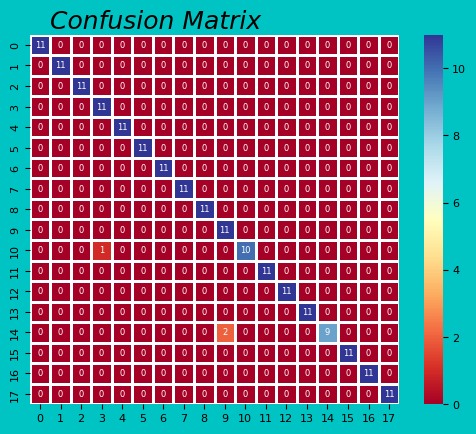

In [220]:
# confusion matrix
from sklearn.metrics import confusion_matrix
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
# classification_report
from sklearn.metrics import classification_report
# kappa
from sklearn.metrics import cohen_kappa_score


true_labels = df['actual_class']
predicted_labels = df['predicted_class']

matrix = confusion_matrix(true_labels, predicted_labels)
print(matrix, '\n')

accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy: %f' % accuracy, '\n')
print('Error rate: %f' % (1-accuracy), '\n')

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report, '\n')

kappa = cohen_kappa_score(true_labels, predicted_labels)
print('Cohens kappa: %f' % kappa)



# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['font.size'] = 8
bg_color = (0, 0.77, 0.77)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

fig, ax = plt.subplots(1)

plt.text(1, -.3, "Confusion Matrix", fontsize = 18, color='Black', fontstyle='italic')

ax = sns.heatmap(matrix, annot=True, annot_kws={'size':6}, fmt="d",
                 robust=True, linewidths=.9, cmap="RdYlBu", square=True)
# vmin=0, vmax=350,
plt.savefig("Confusion_Matrix.jpeg", dpi=300, facecolor=bg_color, transparent=True)
plt.show()


# Test with unseen data

In [12]:
# Vocabulary
vocabulary = ['bear', 'blue_whale', 'bobcat', 'cat', 'chimp', 
              'chimpanzee', 'cow', 'dog', 'dolphin', 'giant', 
              'giant_panda', 'gorilla', 'hippopotamus', 
              'humpback_whale', 'killer_whale', 'leopard', 
              'lion', 'monkey', 'mouse', 'ox', 'panda', 
              'persian_cat', 'pig', 'polar_bear', 'rabbit', 
              'raccoon', 'rat', 'rhinoceros', 'seal', 'sealskin', 
              'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 
              'tiger', 'walrus']


synonyms_class_dct = {'chimpanzee': ['chimpanzee', 'chimp', 'monkey', 'gorilla'],
                      'giant_panda': ['giant_panda', 'giant', 'panda', 'bear'],
                      'seal': ['seal', 'sealskin', 'walrus'],
                      'walrus': ['seal', 'sealskin', 'walrus'],
                      'rat': ['rat', 'mouse']}
print(synonyms_class_dct)

class_numbers = {name : index for index, name in enumerate(sorted([img_path.split('\\')[-1] for img_path in glob.glob(os.path.join('test_class', '*'))]))}
print(class_numbers)

{'chimpanzee': ['chimpanzee', 'chimp', 'monkey', 'gorilla'], 'giant_panda': ['giant_panda', 'giant', 'panda', 'bear'], 'seal': ['seal', 'sealskin', 'walrus'], 'walrus': ['seal', 'sealskin', 'walrus'], 'rat': ['rat', 'mouse']}
{'chimpanzee': 0, 'giant_panda': 1, 'hippopotamus': 2, 'humpback_whale': 3, 'leopard': 4, 'persian_cat': 5, 'pig': 6, 'raccoon': 7, 'rat': 8, 'seal': 9}


In [277]:
# Load models
classification_model = load_model('model_h5_sample100.h5')
min_max_scaler_model = load(open('min_max_scaler_h5_sample100.pkl', 'rb'))
class_labels = ['bear', 'blue_whale', 'bobcat', 'cow', 'dolphin', 'gorilla', 
                'killer_whale', 'lion', 'monkey', 'mouse', 'ox', 'rabbit', 
                'rhinoceros', 'siamese_cat', 'skunk', 'squirrel', 'tiger', 'walrus']


image_path, image_label, pred_image_label, act_label, pred_label, similar_words = [], [], [], [], [], []

folder_name = 'seal'
folder_path = os.path.join('test_class', folder_name, '*')

for img_path in glob.glob(folder_path):
# for img_path in glob.glob(r"test/*/*"):
    print(f"img_path : {img_path}")
    image_path.append(img_path)
    image_label.append(img_path.split('\\')[-2])
#     act_label.append(class_labels.index(img_path.split('\\')[-2]))

    # Extract visual features using ResNet50
    visual_features = extract_visual_features(img_path)
#     print(f"visual_features : {visual_features.shape} || {type(visual_features)}")

    # Compute texture features using GLCM
    texture_features = compute_texture_features(img_path)
#     print(f"texture_feat : {texture_features.shape} || {type(texture_features)}")
    
    # Concatenate visual and texture features
    l1 = visual_features[0].tolist()
    l2 = texture_features.tolist()
    l1.extend(l2)
    combined_features = np.array(l1)
#     print(f"combined_features : {combined_features}")
    
    # Normalize the features
    train_normalized_texture_features = min_max_scaler_model.transform([combined_features])
    train_normalized_texture_features_df = pd.DataFrame(train_normalized_texture_features)
#     print(f"train_normalized_texture_features_df : {train_normalized_texture_features_df}")

#     model.predict
    predicted_value = classification_model.predict(train_normalized_texture_features_df) # , verbos=0
    print(f"predicted_value : {np.argmax(predicted_value)} || {class_labels[np.argmax(predicted_value)]}")
    pred_image_label.append(class_labels[np.argmax(predicted_value)])
#     pred_label.append(np.argmax(predicted_value))
    
    similar_words_bert = predict_with_bert(class_labels[np.argmax(predicted_value)], vocabulary) # class_labels
    print(f"similar_words_bert : {similar_words_bert}")
    similar_words.append(similar_words_bert)
#     break

img_path : test_class\seal\seal_10002.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 61ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']
img_path : test_class\seal\seal_10003.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 50ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']
img_path : test_class\seal\seal_10004.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 108ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']
img_path : test_class\seal\seal_10005.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 36ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']
img_path : test_class\seal\seal_10006.jpg


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 33ms/step
predicted_value : 12 || rhinoceros
similar_words_bert : ['rhinoceros', 'walrus', 'bobcat', 'raccoon', 'chimpanzee']
img_path : test_class\seal\seal_10007.jpg
1/1 [==============================] - 0s 24ms/step


C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']
img_path : test_class\seal\seal_10008.jpg
1/1 [==============================] - ETA: 0s

C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Project_Work\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be 

1/1 [==============================] - 0s 26ms/step
predicted_value : 17 || walrus
similar_words_bert : ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']


In [278]:
out_df = pd.DataFrame({
    'image_path' : image_path, 
    'class_name' : image_label, 
    'pred_image_label' : pred_image_label, 
#     'act_label' : act_label, 
#     'pred_label' : pred_label,
    'similar_words' : similar_words
})
out_df

image_path class_name pred_image_label  \
0  test_class\seal\seal_10002.jpg       seal           walrus   
1  test_class\seal\seal_10003.jpg       seal           walrus   
2  test_class\seal\seal_10004.jpg       seal           walrus   
3  test_class\seal\seal_10005.jpg       seal           walrus   
4  test_class\seal\seal_10006.jpg       seal       rhinoceros   
5  test_class\seal\seal_10007.jpg       seal           walrus   
6  test_class\seal\seal_10008.jpg       seal           walrus   

                                       similar_words  
0             [walrus, chimp, raccoon, bobcat, lion]  
1             [walrus, chimp, raccoon, bobcat, lion]  
2             [walrus, chimp, raccoon, bobcat, lion]  
3             [walrus, chimp, raccoon, bobcat, lion]  
4  [rhinoceros, walrus, bobcat, raccoon, chimpanzee]  
5             [walrus, chimp, raccoon, bobcat, lion]  
6             [walrus, chimp, raccoon, bobcat, lion]

In [279]:
metadata_folder_name = 'metadata_with_BERT_unseen_data'
os.makedirs(metadata_folder_name, exist_ok=True) 
metadata_file_name = os.path.join(metadata_folder_name, folder_name + '_BERT_unseen_data_result.csv')
out_df.to_csv(metadata_file_name, index = False)

In [280]:
'''
Note : Run only after compliting all classes
'''
metadata_file_name = os.path.join(metadata_folder_name, '*')
df_list = [pd.read_csv(df_path) for df_path in glob.glob(metadata_file_name)]

out_df = pd.concat(df_list).reset_index(drop=True)

# out_df['similar_words'] = out_df['similar_words'].apply(ast.literal_eval)

out_df

image_path  class_name pred_image_label  \
0   test_class\chimpanzee\chimpanzee_10002.jpg  chimpanzee          gorilla   
1   test_class\chimpanzee\chimpanzee_10005.jpg  chimpanzee           monkey   
2   test_class\chimpanzee\chimpanzee_10007.jpg  chimpanzee           monkey   
3   test_class\chimpanzee\chimpanzee_10011.jpg  chimpanzee           monkey   
4   test_class\chimpanzee\chimpanzee_10014.jpg  chimpanzee           monkey   
..                                         ...         ...              ...   
65              test_class\seal\seal_10004.jpg        seal           walrus   
66              test_class\seal\seal_10005.jpg        seal           walrus   
67              test_class\seal\seal_10006.jpg        seal       rhinoceros   
68              test_class\seal\seal_10007.jpg        seal           walrus   
69              test_class\seal\seal_10008.jpg        seal           walrus   

                                        similar_words  
0   ['gorilla', 'leopard', 'tiger', 'mouse', 'panda']  
1   ['monkey', 'squirrel', 'rabbit', 'lion', 'tiger']  
2   ['monkey', 'squirrel', 'rabbit', 'lion', 'tiger']  
3   ['monkey', 'squirrel', 'rabbit', 'lion', 'tiger']  
4   ['monkey', 'squirrel', 'rabbit', 'lion', 'tiger']  
..                                                ...  
65   ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']  
66   ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']  
67  ['rhinoceros', 'walrus', 'bobcat', 'raccoon', ...  
68   ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']  
69   ['walrus', 'chimp', 'raccoon', 'bobcat', 'lion']  

[70 rows x 4 columns]

In [281]:
out_df.to_csv("result_with_BERT_unseen_data.csv", index = False)

In [282]:
# working on CR

In [2]:
class_labels = ['bear', 'blue_whale', 'bobcat', 'cow', 'dolphin', 'gorilla', 
                'killer_whale', 'lion', 'monkey', 'mouse', 'ox', 'rabbit', 
                'rhinoceros', 'siamese_cat', 'skunk', 'squirrel', 'tiger', 'walrus']


vocabulary = ['bear', 'blue_whale', 'bobcat', 'cat', 'chimp', 
              'chimpanzee', 'cow', 'dog', 'dolphin', 'giant', 
              'giant_panda', 'gorilla', 'hippopotamus', 
              'humpback_whale', 'killer_whale', 'leopard', 
              'lion', 'monkey', 'mouse', 'ox', 'panda', 
              'persian_cat', 'pig', 'polar_bear', 'rabbit', 
              'raccoon', 'rat', 'rhinoceros', 'seal', 'sealskin', 
              'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 
              'tiger', 'walrus']


synonyms_class_dct = {'chimpanzee': ['chimpanzee', 'chimp', 'monkey', 'gorilla'],
                      'giant_panda': ['giant_panda', 'giant', 'panda', 'bear'],
                      'hippopotamus': ['hippopotamus', 'rhinoceros'],
                      'humpback_whale': ['humpback_whale', 'whale', 'blue_whale', 'killer_whale'],
                      'leopard': ['leopard', 'tiger', 'lion', 'bobcat'],
                      'persian_cat': ['persian_cat', 'siamese_cat'],
                      'pig': ['pig'],
                      'raccoon': ['raccoon', 'skunk'],
                      'seal': ['seal', 'sealskin', 'walrus'],
                      'rat': ['rat', 'mouse']}

In [21]:
df = pd.read_csv("result_with_BERT_unseen_data.csv")
# Convert sting to list
df['similar_words'] = df['similar_words'].apply(lambda col: list(ast.literal_eval(col)))
display(df.head())

predicted_right = []
actual_class, predicted_class = [], []

for index, row in df.iterrows():
#     print(row["class_name"], row["similar_words"], row["class_name"] in row["similar_words"], type(df["similar_words"][index]))
#     print(row["class_name"], row["similar_words"], row["class_name"] in list(synonyms_class_dct.keys()))

    if row["class_name"] in list(synonyms_class_dct.keys()):
        print(synonyms_class_dct[row["class_name"]], any(synonyms_class_dct[element] in row["similar_words"] for element in list(synonyms_class_dct.keys())))
        
#         if any(element in row["similar_list"] for element in synonyms_class_dct[row["class_name"]]):
#           predicted_right.append(True)
#           actual_class.append(class_dct[row["class_name"]])
#           predicted_class.append(class_dct[row["class_name"]])
        
        
    break

image_path  class_name pred_image_label  \
0  test_class\chimpanzee\chimpanzee_10002.jpg  chimpanzee          gorilla   
1  test_class\chimpanzee\chimpanzee_10005.jpg  chimpanzee           monkey   
2  test_class\chimpanzee\chimpanzee_10007.jpg  chimpanzee           monkey   
3  test_class\chimpanzee\chimpanzee_10011.jpg  chimpanzee           monkey   
4  test_class\chimpanzee\chimpanzee_10014.jpg  chimpanzee           monkey   

                             similar_words  
0  [gorilla, leopard, tiger, mouse, panda]  
1  [monkey, squirrel, rabbit, lion, tiger]  
2  [monkey, squirrel, rabbit, lion, tiger]  
3  [monkey, squirrel, rabbit, lion, tiger]  
4  [monkey, squirrel, rabbit, lion, tiger]

['chimpanzee', 'chimp', 'monkey', 'gorilla'] False


In [31]:
for element in list(synonyms_class_dct.keys()):
    print('Key : ', element)
    if any(element in row["similar_words"] for element in synonyms_class_dct[row["class_name"]]):
        for val in synonyms_class_dct[element]:
            print(val, row["similar_words"], val in row["similar_words"])

Key :  chimpanzee
chimpanzee ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
chimp ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
monkey ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
gorilla ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] True
Key :  giant_panda
giant_panda ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
giant ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
panda ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] True
bear ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
Key :  hippopotamus
hippopotamus ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
rhinoceros ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
Key :  humpback_whale
humpback_whale ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
whale ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
blue_whale ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
killer_whale ['gorilla', 'leopard', 'tiger', 'mouse', 'panda'] False
Key :  le

In [284]:
folder_path = os.path.join('test_class', '*')
for img_path in glob.glob(folder_path):
    print(img_path.split('\\')[-1])


chimpanzee
giant_panda
hippopotamus
humpback_whale
leopard
persian_cat
pig
raccoon
rat
seal
